# Stock Prediction - Using Only Stock Data (5 Years Timeframe)

In [75]:
import talib
import numpy as np
import random
random.seed(42)

In [76]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

tickers = ['GME']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2016-02-26'
end_date = '2021-02-26'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('GME', 'yahoo', start_date, end_date).reset_index()

In [77]:
panel_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-02-26,30.610001,29.930000,30.110001,30.540001,1693900.0,23.569849
1,2016-02-29,31.090000,30.020000,30.440001,30.820000,2350400.0,23.785942
2,2016-03-01,31.240000,30.490000,31.049999,30.940001,2130100.0,23.878555
3,2016-03-02,31.680000,29.160000,30.879999,31.290001,4113100.0,24.148674
4,2016-03-03,32.950001,31.280001,31.360001,32.709999,3549000.0,25.244589


In [78]:
panel_data.shape

(1260, 7)

In [79]:
dataset = panel_data.dropna()
#dataset = dataset[['Open', 'High', 'Low', 'Close']]

New columns
- High minus Low price
- Close minus Open price
- Three day moving average
- Ten day moving average
- 30 day moving average
- Standard deviation for a period of 5 days
- Relative Strength Index (RSI): chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.
- Williams %R: technical analysis oscillator showing the current closing price in relation to the high and low of the past N days.

In [80]:
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

We then define the output value as price rise, which is a binary variable storing 1 when the closing price of tomorrow is greater than the closing price of today.
- Price Rise

In [81]:
dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

In [82]:
#drop nan
dataset = dataset.dropna()

In [83]:
#from 2020-12-28 to 2021-02-26
dataset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
30,2016-04-11,30.620001,29.719999,29.740000,29.879999,2045300.0,23.324310,0.900002,0.139999,29.566667,30.635,30.847667,0.470563,43.065726,-68.115975,1
31,2016-04-12,30.469999,29.709999,30.000000,30.090000,1960100.0,23.488241,0.760000,0.090000,29.496667,30.614,30.825667,0.421699,45.932418,-54.958673,1
32,2016-04-13,31.600000,30.190001,30.250000,31.469999,2172900.0,24.565464,1.410000,1.219999,29.820000,30.472,30.801334,0.896855,60.598891,-5.000040,1
33,2016-04-14,31.730000,30.610001,31.360001,31.650000,2564900.0,24.705973,1.119999,0.289999,30.480000,30.443,30.819000,0.979122,62.107207,-2.930401,1
34,2016-04-15,32.139999,31.510000,31.750000,31.790001,2585500.0,24.815258,0.629999,0.040001,31.070000,30.435,30.831000,0.914757,63.335333,-11.146450,1


In [84]:
X = dataset.iloc[:, 5:-1]
y = dataset.iloc[:, -1]

In [85]:
X.shape

(1230, 10)

In [86]:
y.shape

(1230,)

In [87]:
#split the dataset
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [88]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1. Building the Artificial Neural Network

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [90]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [91]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [92]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
99/99 [==============================] - 0s 393us/step - loss: 0.2502 - accuracy: 0.5071
Epoch 2/100
99/99 [==============================] - 0s 383us/step - loss: 0.2490 - accuracy: 0.5122
Epoch 3/100
99/99 [==============================] - 0s 373us/step - loss: 0.2494 - accuracy: 0.5122
Epoch 4/100
99/99 [==============================] - 0s 373us/step - loss: 0.2490 - accuracy: 0.5264
Epoch 5/100
99/99 [==============================] - 0s 383us/step - loss: 0.2478 - accuracy: 0.5447
Epoch 6/100
99/99 [==============================] - 0s 373us/step - loss: 0.2475 - accuracy: 0.5518
Epoch 7/100
99/99 [==============================] - 0s 373us/step - loss: 0.2475 - accuracy: 0.5488
Epoch 8/100
99/99 [==============================] - 0s 373us/step - loss: 0.2474 - accuracy: 0.5295
Epoch 9/100
99/99 [==============================] - 0s 373us/step - loss: 0.2452 - accuracy: 0.5518
Epoch 10/100
99/99 [==============================] - 0s 383us/step - loss: 0.2444 - accura

99/99 [==============================] - 0s 383us/step - loss: 0.1621 - accuracy: 0.7652
Epoch 82/100
99/99 [==============================] - 0s 373us/step - loss: 0.1605 - accuracy: 0.7683
Epoch 83/100
99/99 [==============================] - 0s 373us/step - loss: 0.1584 - accuracy: 0.7795
Epoch 84/100
99/99 [==============================] - 0s 373us/step - loss: 0.1601 - accuracy: 0.7713
Epoch 85/100
99/99 [==============================] - 0s 373us/step - loss: 0.1567 - accuracy: 0.7774
Epoch 86/100
99/99 [==============================] - 0s 373us/step - loss: 0.1558 - accuracy: 0.7713
Epoch 87/100
99/99 [==============================] - 0s 373us/step - loss: 0.1524 - accuracy: 0.7795
Epoch 88/100
99/99 [==============================] - 0s 373us/step - loss: 0.1515 - accuracy: 0.7876
Epoch 89/100
99/99 [==============================] - 0s 373us/step - loss: 0.1507 - accuracy: 0.7835
Epoch 90/100
99/99 [==============================] - 0s 373us/step - loss: 0.1467 - accuracy: 

## 2.Predicting the movement of the stock
- True or False depending on whether the predicted value was greater or less than 0.5

In [93]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [94]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

## 3. Computing Strategy Returns
- We will be taking a long position when the predicted value of y is true and will take a short position when the predicted signal is False.
- Compute the returns that the strategy will earn if a long position is taken at the end of today, and squared off at the end of the next day

In [95]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

<ipython-input-95-3098c58b4cf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = 0.
<ipython-input-95-3098c58b4cf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
<ipython-input-95-3098c58b4cf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [96]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

<ipython-input-96-c8d278af7601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = 0.
<ipython-input-96-c8d278af7601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])


In [97]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

<ipython-input-97-c41e1247ab30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
<ipython-input-97-c41e1247ab30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])


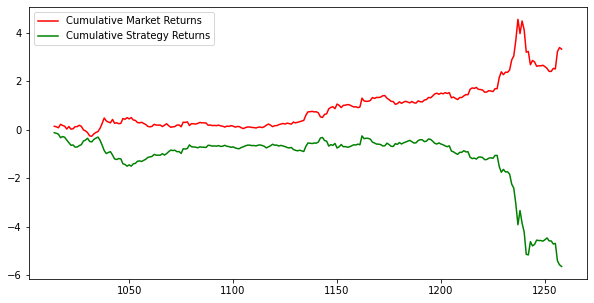

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Cumulative Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Cumulative Strategy Returns')
plt.legend()
plt.show()

In [99]:
trade_dataset["Date"]

1014   2020-03-09
1015   2020-03-10
1016   2020-03-11
1017   2020-03-12
1018   2020-03-13
          ...    
1255   2021-02-22
1256   2021-02-23
1257   2021-02-24
1258   2021-02-25
1259   2021-02-26
Name: Date, Length: 246, dtype: datetime64[ns]

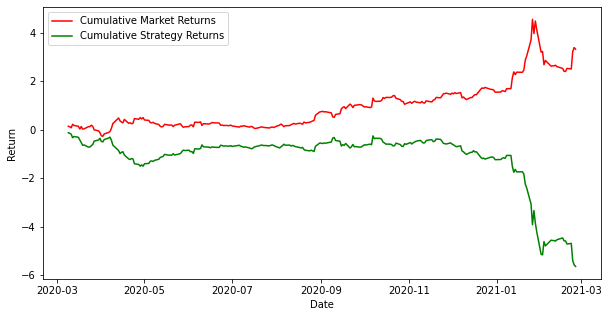

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset["Date"],trade_dataset['Cumulative Market Returns'], color='r', label='Cumulative Market Returns')
plt.plot(trade_dataset["Date"],trade_dataset['Cumulative Strategy Returns'], color='g', label='Cumulative Strategy Returns')
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()

# Stock Price Prediction -  Using Stock, Sentiment, and Network Data (3 Months Data)

In [101]:
sentiment_df = pd.read_csv('C:/Users/becky/OneDrive/Desktop/sentiment_df.csv')
network_df = pd.read_csv('C:/Users/becky/OneDrive/Desktop/Features_prediction.csv')

In [102]:
#from 2020-12-27 to 2021-02-26
#sentiment_df = sentiment_df.iloc[1:,:]
sentiment_df

,date,sentiment_score
0,2020-12-27,0.358064
1,2020-12-28,0.280789
2,2020-12-29,0.214934
3,2020-12-30,0.505211
4,2020-12-31,0.353148
...,...,...
57,2021-02-22,0.097879
58,2021-02-23,0.029523
59,2021-02-24,0.075004
60,2021-02-25,-0.012352


In [103]:
network_df = network_df.iloc[:,1:]

In [104]:
network_df

,Datetime,degree,betweenness_centrality,closeness_centrality,listedCount,followersCount
0,2020-12-27,0.000060,0.000000e+00,0.000000,0.500000,202.750000
1,2020-12-28,0.000057,1.465538e-10,0.000005,1.272727,214.000000
2,2020-12-29,0.000054,0.000000e+00,0.000000,11.666667,849.333333
3,2020-12-30,0.000065,4.030228e-10,0.000009,10.400000,3555.000000
4,2020-12-31,0.000067,0.000000e+00,0.000000,2.647059,160.941176
...,...,...,...,...,...,...
57,2021-02-22,0.000050,0.000000e+00,0.000002,68.177419,1506.145161
58,2021-02-23,0.000067,1.216532e-09,0.000008,111.259259,5861.611111
59,2021-02-24,0.000064,7.916520e-11,0.000003,50.718750,3266.794643
60,2021-02-25,0.000054,1.864323e-10,0.000003,39.544218,2580.323129


In [105]:
import talib
import numpy as np
import random
random.seed(42)

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

tickers = ['GME']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2020-11-11'
end_date = '2021-02-26'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('GME', 'yahoo', start_date, end_date).reset_index()

In [106]:
panel_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-11-11,11.95,11.21,11.50,11.75,4882600,11.75
1,2020-11-12,11.87,10.97,11.74,11.13,4353300,11.13
2,2020-11-13,11.55,11.00,11.36,11.01,3535900,11.01
3,2020-11-16,12.66,10.72,11.16,12.06,9774800,12.06
4,2020-11-17,11.92,11.23,11.65,11.63,6678200,11.63


In [107]:
panel_data.shape

(73, 7)

In [108]:
dataset = panel_data.dropna()
#dataset = dataset[['Open', 'High', 'Low', 'Close']]

New columns
- High minus Low price
- Close minus Open price
- Three day moving average
- Ten day moving average
- 30 day moving average
- Standard deviation for a period of 5 days
- Relative Strength Index (RSI): chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.
- Williams %R: technical analysis oscillator showing the current closing price in relation to the high and low of the past N days.
- - Price Rise: binary variable storing 1 when the closing price of tomorrow is greater than the closing price of today

In [109]:
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)
dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

In [110]:
#drop nan
dataset = dataset.dropna()

In [111]:
#from 2020-12-28 to 2021-02-26
dataset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
30,2020-12-24,21.480000,19.950001,21.010000,20.150000,6262200,20.150000,1.529999,-0.860001,18.520000,15.387,14.516667,2.485844,74.465010,-25.085526,1
31,2020-12-28,21.969999,20.350000,21.309999,20.990000,8965900,20.990000,1.619999,-0.320000,20.059999,15.990,14.796667,2.203520,76.868946,-15.525121,0
32,2020-12-29,21.070000,18.559999,20.820000,19.379999,9241400,19.379999,2.510000,-1.440001,20.570000,16.758,15.125333,0.696958,63.897950,-41.422611,0
33,2020-12-30,20.000000,18.850000,19.379999,19.260000,5934400,19.260000,1.150000,-0.119999,20.173333,17.424,15.404333,0.747496,63.006471,-43.705797,0
34,2020-12-31,19.799999,18.799999,19.250000,18.840000,6922700,18.840000,1.000000,-0.410000,19.876666,17.965,15.644333,0.851369,59.725454,-56.612900,0


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 30 to 72
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         43 non-null     datetime64[ns]
 1   High         43 non-null     float64       
 2   Low          43 non-null     float64       
 3   Open         43 non-null     float64       
 4   Close        43 non-null     float64       
 5   Volume       43 non-null     int64         
 6   Adj Close    43 non-null     float64       
 7   H-L          43 non-null     float64       
 8   O-C          43 non-null     float64       
 9   3day MA      43 non-null     float64       
 10  10day MA     43 non-null     float64       
 11  30day MA     43 non-null     float64       
 12  Std_dev      43 non-null     float64       
 13  RSI          43 non-null     float64       
 14  Williams %R  43 non-null     float64       
 15  Price_Rise   43 non-null     int32         
dtypes: dateti

In [113]:
sentiment_df['date'] = sentiment_df['date'].astype('datetime64')
network_df["Datetime"] = network_df["Datetime"].astype('datetime64')

In [114]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             62 non-null     datetime64[ns]
 1   sentiment_score  62 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [115]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                62 non-null     datetime64[ns]
 1   degree                  62 non-null     float64       
 2   betweenness_centrality  62 non-null     float64       
 3   closeness_centrality    62 non-null     float64       
 4   listedCount             62 non-null     float64       
 5   followersCount          62 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.0 KB


In [116]:
#merge sentiment df to stock df based on date
dataset = dataset.merge(sentiment_df, left_on="Date", right_on="date")

In [117]:
#merge netowork df to stock df based on date
dataset = dataset.merge(network_df, left_on="Date", right_on="Datetime")
dataset = dataset[["High","Low","Open","Close","Volume","Adj Close","H-L","O-C","3day MA","10day MA","30day MA","Std_dev","RSI","Williams %R","degree","betweenness_centrality","followersCount","sentiment_score","Price_Rise"]]

In [118]:
dataset.head()

,High,Low,Open,Close,Volume,Adj Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,degree,betweenness_centrality,followersCount,sentiment_score,Price_Rise
0,21.969999,20.350000,21.309999,20.990000,8965900,20.990000,1.619999,-0.320000,20.059999,15.990,14.796667,2.203520,76.868946,-15.525121,0.000057,1.465538e-10,214.000000,0.280789,0
1,21.070000,18.559999,20.820000,19.379999,9241400,19.379999,2.510000,-1.440001,20.570000,16.758,15.125333,0.696958,63.897950,-41.422611,0.000054,0.000000e+00,849.333333,0.214934,0
2,20.000000,18.850000,19.379999,19.260000,5934400,19.260000,1.150000,-0.119999,20.173333,17.424,15.404333,0.747496,63.006471,-43.705797,0.000065,4.030228e-10,3555.000000,0.505211,0
3,19.799999,18.799999,19.250000,18.840000,6922700,18.840000,1.000000,-0.410000,19.876666,17.965,15.644333,0.851369,59.725454,-56.612900,0.000067,0.000000e+00,160.941176,0.353148,0
4,19.100000,17.150000,19.000000,17.250000,10022500,17.250000,1.950001,-1.750000,19.160000,18.464,15.884667,1.337584,48.883942,-98.076916,0.000060,0.000000e+00,847.375000,0.257500,1


In [119]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [120]:
#split the dataset
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [121]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1. Building the Artificial Neural Network

In [122]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [123]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [124]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [125]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 492us/step - loss: 0.2501 - accuracy: 0.5455
Epoch 2/100
4/4 [==============================] - 0s 492us/step - loss: 0.2483 - accuracy: 0.6061
Epoch 3/100
4/4 [==============================] - 0s 499us/step - loss: 0.2467 - accuracy: 0.6364
Epoch 4/100
4/4 [==============================] - 0s 250us/step - loss: 0.2450 - accuracy: 0.6061
Epoch 5/100
4/4 [==============================] - 0s 249us/step - loss: 0.2427 - accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 249us/step - loss: 0.2400 - accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 249us/step - loss: 0.2367 - accuracy: 0.6364
Epoch 8/100
4/4 [==============================] - 0s 249us/step - loss: 0.2309 - accuracy: 0.6970
Epoch 9/100
4/4 [==============================] - 0s 499us/step - loss: 0.2259 - accuracy: 0.7273
Epoch 10/100
4/4 [==============================] - 0s 249us/step - loss: 0.2199 - accuracy: 0.6667
Epoch 11/

4/4 [==============================] - 0s 499us/step - loss: 0.0236 - accuracy: 1.0000
Epoch 84/100
4/4 [==============================] - 0s 499us/step - loss: 0.0230 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 498us/step - loss: 0.0239 - accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - 0s 499us/step - loss: 0.0209 - accuracy: 1.0000
Epoch 87/100
4/4 [==============================] - 0s 499us/step - loss: 0.0197 - accuracy: 1.0000
Epoch 88/100
4/4 [==============================] - 0s 499us/step - loss: 0.0247 - accuracy: 0.9697
Epoch 89/100
4/4 [==============================] - 0s 498us/step - loss: 0.0230 - accuracy: 0.9697
Epoch 90/100
4/4 [==============================] - 0s 498us/step - loss: 0.0210 - accuracy: 1.0000
Epoch 91/100
4/4 [==============================] - 0s 499us/step - loss: 0.0206 - accuracy: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 250us/step - loss: 0.0194 - accuracy: 1.0000
Epoch 93/100


## 2.Predicting the movement of the stock

In [126]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [127]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

## 3. Computing Strategy Returns

In [128]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

<ipython-input-128-3098c58b4cf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = 0.
<ipython-input-128-3098c58b4cf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
<ipython-input-128-3098c58b4cf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [129]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

<ipython-input-129-c8d278af7601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = 0.
<ipython-input-129-c8d278af7601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])


In [130]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

<ipython-input-130-c41e1247ab30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
<ipython-input-130-c41e1247ab30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])


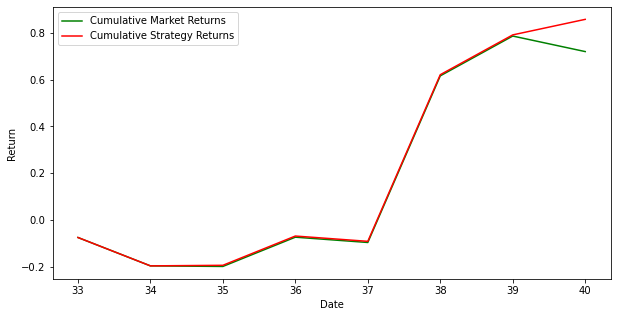

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='g', label='Cumulative Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='r', label='Cumulative Strategy Returns')
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()

# Stock Price Prediction - Using Only Stock Dataset (3 Months Data)

In [59]:
tickers = ['GME']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2020-11-11'
end_date = '2021-02-26'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('GME', 'yahoo', start_date, end_date).reset_index()

In [60]:
dataset = panel_data.dropna()
dataset = dataset[['Open', 'High', 'Low', 'Close']]

In [61]:
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)
dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

In [62]:
#drop nan
dataset = dataset.dropna()

In [63]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [64]:
#split the dataset
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [65]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 488us/step - loss: 0.2501 - accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 499us/step - loss: 0.2488 - accuracy: 0.5588
Epoch 3/100
4/4 [==============================] - 0s 249us/step - loss: 0.2479 - accuracy: 0.5882
Epoch 4/100
4/4 [==============================] - 0s 499us/step - loss: 0.2472 - accuracy: 0.5882
Epoch 5/100
4/4 [==============================] - 0s 499us/step - loss: 0.2460 - accuracy: 0.5882
Epoch 6/100
4/4 [==============================] - 0s 498us/step - loss: 0.2453 - accuracy: 0.6176
Epoch 7/100
4/4 [==============================] - 0s 499us/step - loss: 0.2443 - accuracy: 0.6471
Epoch 8/100
4/4 [==============================] - 0s 499us/step - loss: 0.2429 - accuracy: 0.6471
Epoch 9/100
4/4 [==============================] - 0s 499us/step - loss: 0.2418 - accuracy: 0.6471
Epoch 10/100
4/4 [==============================] - 0s 499us/step - loss: 0.2392 - accuracy: 0.6471
Epoch 11/

4/4 [==============================] - 0s 499us/step - loss: 0.0952 - accuracy: 0.9118
Epoch 84/100
4/4 [==============================] - 0s 249us/step - loss: 0.0940 - accuracy: 0.8824
Epoch 85/100
4/4 [==============================] - 0s 249us/step - loss: 0.0960 - accuracy: 0.8529
Epoch 86/100
4/4 [==============================] - 0s 249us/step - loss: 0.0935 - accuracy: 0.8824
Epoch 87/100
4/4 [==============================] - 0s 249us/step - loss: 0.0907 - accuracy: 0.9118
Epoch 88/100
4/4 [==============================] - 0s 499us/step - loss: 0.0974 - accuracy: 0.8824
Epoch 89/100
4/4 [==============================] - 0s 499us/step - loss: 0.0951 - accuracy: 0.8824
Epoch 90/100
4/4 [==============================] - 0s 499us/step - loss: 0.0904 - accuracy: 0.9118
Epoch 91/100
4/4 [==============================] - 0s 499us/step - loss: 0.0901 - accuracy: 0.8824
Epoch 92/100
4/4 [==============================] - 0s 499us/step - loss: 0.0910 - accuracy: 0.9118
Epoch 93/100


In [67]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [68]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [69]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

<ipython-input-69-3098c58b4cf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = 0.
<ipython-input-69-3098c58b4cf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
<ipython-input-69-3098c58b4cf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [70]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

<ipython-input-70-c8d278af7601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = 0.
<ipython-input-70-c8d278af7601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])


In [71]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

<ipython-input-71-c41e1247ab30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
<ipython-input-71-c41e1247ab30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])


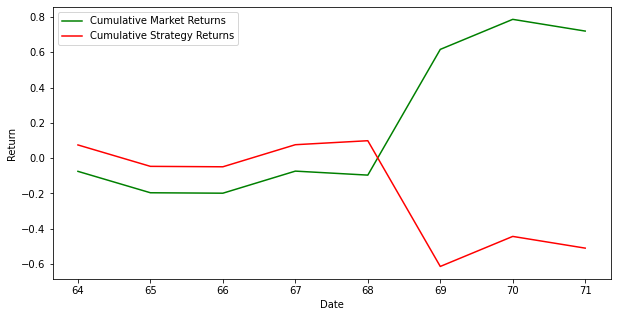

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='g', label='Cumulative Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='r', label='Cumulative Strategy Returns')
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()